In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

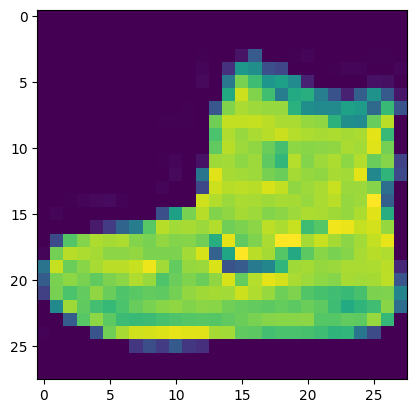

In [6]:
plt.imshow(train_images[0])

In [7]:
train_labels[0]

9

In [8]:
class_names[train_labels[0]]

'Ankle boot'

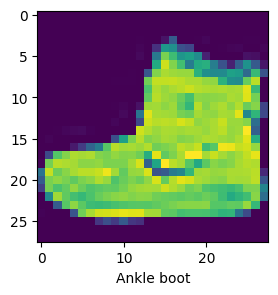

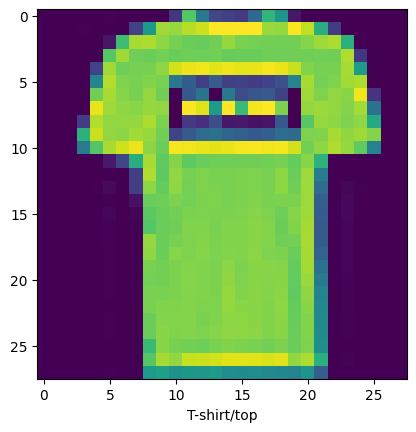

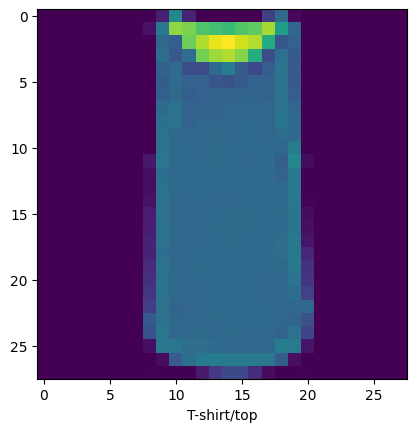

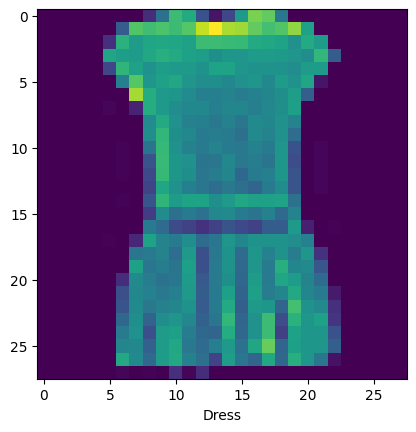

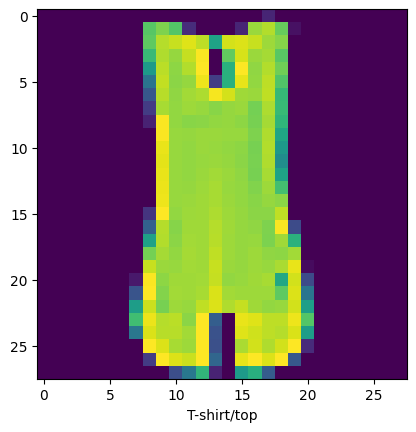

In [9]:
plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [10]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [11]:
[3]*2


[3, 3]

In [12]:
def get_model(hidden_layers=1):
    # Flatten layer for input
    layers = [keras.layers.Flatten(input_shape=(28, 28))]
    # hideen layers
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'),)
    # output layer
    layers.append(keras.layers.Dense(10, activation='sigmoid'))

    model = keras.Sequential(layers)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [13]:
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 4ms/step - loss: 0.4755 - accuracy: 0.8296
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3609 - accuracy: 0.8673
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3212 - accuracy: 0.8821
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2973 - accuracy: 0.8907
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2798 - accuracy: 0.8952


In [14]:
model.predict(test_images_scaled)[2]

313/313 [==============================] - 1s 1ms/step


array([3.1535521e-01, 9.9999988e-01, 7.5596166e-05, 2.9947400e-02,
       1.0459811e-03, 1.8280769e-10, 6.8155158e-04, 4.0514621e-16,
       1.8176683e-05, 2.8922937e-15], dtype=float32)

In [15]:
test_labels[2]

1

In [16]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

<h4 style="color:purple">5 Epocs performance comparison for 1 hidden layer</h4>

In [17]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(1)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4758 - accuracy: 0.8300
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3555 - accuracy: 0.8699
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3220 - accuracy: 0.8808
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2982 - accuracy: 0.8909
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2785 - accuracy: 0.8961
41.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [18]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model = get_model(1)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4730 - accuracy: 0.8317
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3591 - accuracy: 0.8688
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3227 - accuracy: 0.8803
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3003 - accuracy: 0.8888
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2811 - accuracy: 0.8960
42 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<h4 style="color:purple">5 Epocs performance comparison with 5 hidden layers</h4>

In [19]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(5)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5171 - accuracy: 0.8135
Epoch 2/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3905 - accuracy: 0.8590
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3545 - accuracy: 0.8711
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3294 - accuracy: 0.8804
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3097 - accuracy: 0.8865
2min 2s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [20]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model = get_model(5)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5151 - accuracy: 0.8142
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3856 - accuracy: 0.8612
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3506 - accuracy: 0.8730
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3270 - accuracy: 0.8822
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3069 - accuracy: 0.8889
37.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**Here are final performance results**

| Epoch | CPU | GPU  |
|:------|:------|:------|
| 1 | 41.8 sec | 42. sec |
| 5 | 2min 2sec | 37.7 sec |